In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sb
## Read the csv file
df = pd.read_csv("M1_final.csv\M1_final.csv") 
#df.head(10)
df.describe()
df.info()
#Infor regradring Number of Rows and Columns
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

(28820, 23)

# Find Missing values

In [8]:
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [9]:
df["Wind"].value_counts()

W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: Wind, dtype: int64

In [79]:
df["Wind"]=df["Wind"].fillna("W")

In [11]:
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

# Find feature corelations

C:\Users\piyus\AppData\Local\Temp\ipykernel_27228\3469166863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


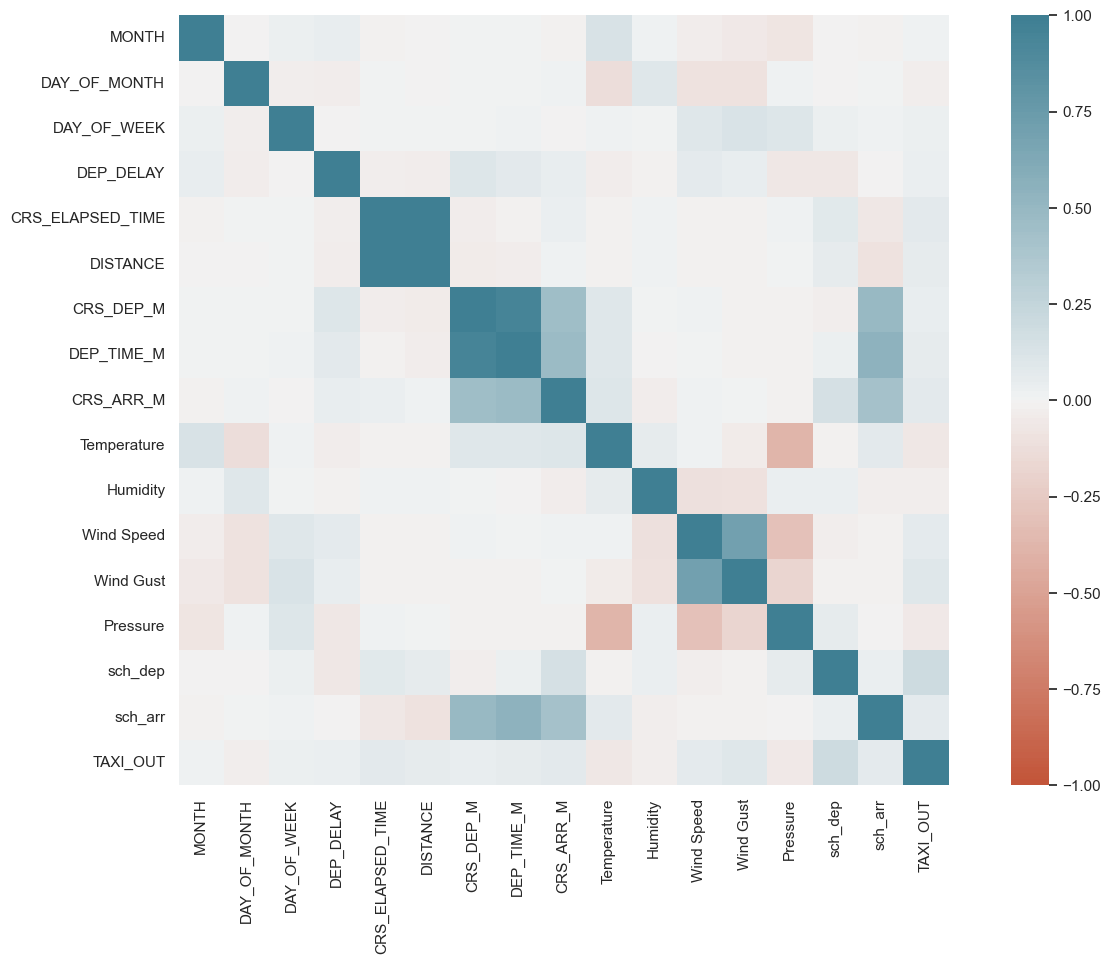

In [80]:
plt.figure(figsize=(16,10))
corr = df.corr()
ax = sb.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sb.diverging_palette(20, 220, n=200),square=True)
plt.show()


# Tried withh all the columns 

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
y = df['TAXI_OUT']
X = df.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Score:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

ValueError: could not convert string to float: '9E'

# Dropped all categorical data colum

In [82]:
# Dropped all categorical data columns
df.drop(["OP_UNIQUE_CARRIER"], axis=1, inplace=True)
df.drop(["TAIL_NUM"], axis=1, inplace=True)
df.drop(["DEST"], axis=1, inplace=True)
df.drop(["Wind"], axis=1, inplace=True)
df.drop(["Condition"], axis=1, inplace=True)

#70% Training and 30% Testing

In [83]:
score_70 = np.zeros(4)
mse_70= np.zeros(4)
score_90 = np.zeros(4)
mse_90= np.zeros(4)


In [84]:
#70% Training and 30% Testing
y = df['TAXI_OUT']
X = df.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

score_70[0] = model.score(X_test, y_test)
mse_70[0]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Score:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
#print(score_70301[0])
#print(mse_7030[0])

Score: 0.0829846519801759
Mean squared error: 42.74


# with 90:10 data

In [85]:
#90% Training and 10% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state =42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_90[0] = model.score(X_test, y_test)
mse_90[0]= np.mean((model.predict(X_test) - y_test) ** 2)
print(model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

0.0919601931435623
Mean squared error: 42.34


# Dropped similar colummns



In [86]:
#drop one of related columns  out of CRS_ELAPSED_TIME,DISTANCE
df.drop(["CRS_ELAPSED_TIME"], axis=1, inplace=True)
#drop one of related columns  out of CRS_DEP_M,DEP_TIME_M
df.drop(["CRS_DEP_M"], axis=1, inplace=True)

In [87]:
#70% Training and 30% Testing
y = df['TAXI_OUT']
X = df.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_70[1] = model.score(X_test, y_test)
mse_70[1]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Score:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Score: 0.0830672565658116
Mean squared error: 42.73


In [88]:
#90% Training and 10% Testing
y = df['TAXI_OUT']
X = df.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_90[1] = model.score(X_test, y_test)
mse_90[1]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Score:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Score: 0.09402308990772124
Mean squared error: 42.24


# Label encoding

In [89]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = pd.read_csv("M1_final.csv\M1_final.csv") 
df["Wind"]=df["Wind"].fillna("W")

In [90]:
df2=df.copy()
df2['OP_UNIQUE_CARRIER']= label_encoder.fit_transform(df2['OP_UNIQUE_CARRIER']) 
df2['TAIL_NUM']= label_encoder.fit_transform(df2['TAIL_NUM']) 
df2['DEST']= label_encoder.fit_transform(df2['DEST']) 
df2['Dew Point']= label_encoder.fit_transform(df2['Dew Point']) 
df2['Wind']= label_encoder.fit_transform(df2['Wind']) 
df2['Condition']= label_encoder.fit_transform(df2['Condition'])

In [91]:
# with 70:30
y = df2['TAXI_OUT']
X = df2.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_70[2] = model.score(X_test, y_test)
mse_70[2]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Accuracy:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Accuracy: 0.08397695031560526
Mean squared error: 42.69


In [92]:
# with 90:10

y = df2['TAXI_OUT']
X = df2.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_90[2] = model.score(X_test, y_test)
mse_90[2]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Accuracy:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Accuracy: 0.09960556111759444
Mean squared error: 41.98


#  One hot Encoding

# Dummies

In [93]:
from sklearn.preprocessing import OneHotEncoder
df_ohe = pd.read_csv("M1_final.csv\M1_final.csv") 
one_hot_encoded_data = pd.get_dummies(df_ohe, columns = ['OP_UNIQUE_CARRIER', 'TAIL_NUM','DEST','Dew Point','Wind','Condition'])

In [94]:
print(one_hot_encoded_data)

       MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  CRS_ELAPSED_TIME  \
0         11             1            5         -1               124   
1         11             1            5         -7               371   
2         11             1            5         40               181   
3         11             1            5         -2               168   
4         11             1            5         -4               139   
...      ...           ...          ...        ...               ...   
28815      1            31            5          2                57   
28816      1            31            5          2                75   
28817      1            31            5        283               392   
28818      1            31            5          5               224   
28819      1            31            5         -1               225   

       DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature  ...  \
0           636        324         323        448           48  

In [95]:
# with 70:30
y = one_hot_encoded_data['TAXI_OUT']
X = one_hot_encoded_data.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Accuracy:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Accuracy: -12276331368349.14
Mean squared error: 572144685111125.50


# Onehotencoder

In [96]:
df_ohe1 = pd.read_csv("M1_final.csv\M1_final.csv") 
categorical_cols = ['OP_UNIQUE_CARRIER', 'TAIL_NUM','DEST','Dew Point','Wind','Condition']
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df_ohe1[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df_ohe1.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df_ohe1.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [99]:
#data_out.head(10)
#data_out.to_csv("ouuoo.csv")
data_out.drop([0], axis=1, inplace=True)

#70:30

In [100]:
y = data_out['TAXI_OUT']
X = data_out.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_70[3] = model.score(X_test, y_test)
mse_70[3]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Accuracy:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Accuracy: 0.07347974288468184
Mean squared error: 43.18


#90:10

In [101]:
y = data_out['TAXI_OUT']
X = data_out.drop(['TAXI_OUT'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state =42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_90[3] = model.score(X_test, y_test)
mse_90[3]= np.mean((model.predict(X_test) - y_test) ** 2)
print("Accuracy:",model.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Accuracy: 0.08181722726247931
Mean squared error: 42.81


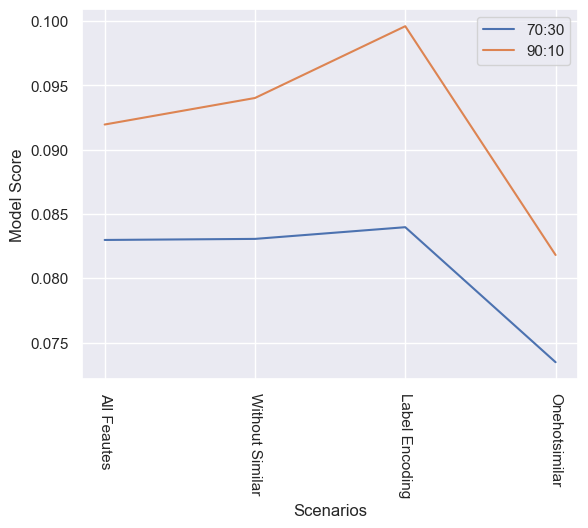

In [102]:
models = [
          "All Feautes", "Without Similar","Label Encoding","Onehotsimilar"
         ]

plt.plot(models, score_70, label="70:30")
plt.plot(models, score_90, label="90:10")

plt.xlabel("Scenarios")
plt.xticks(rotation = -90)
plt.ylabel("Model Score")

plt.legend()
plt.show()

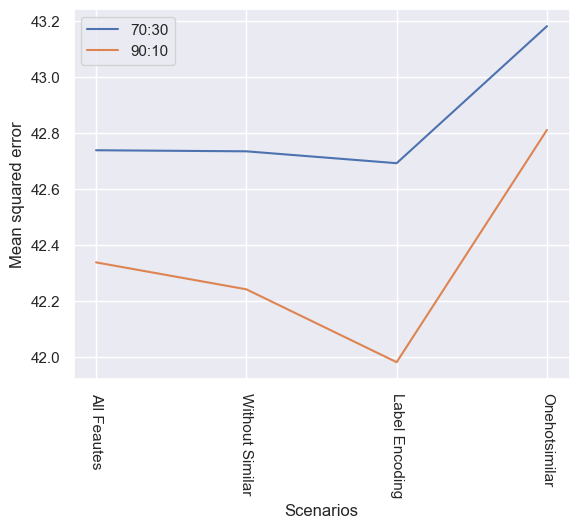

In [108]:
models = [
          "All Feautes", "Without Similar","Label Encoding","Onehotsimilar"
         ]

plt.plot(models, mse_70, label="70:30")
plt.plot(models, mse_90, label="90:10")

plt.xlabel("Scenarios")
plt.xticks(rotation = -90)
plt.ylabel("Mean squared error")

plt.legend()
plt.show()

# plots of different features against the target variable.

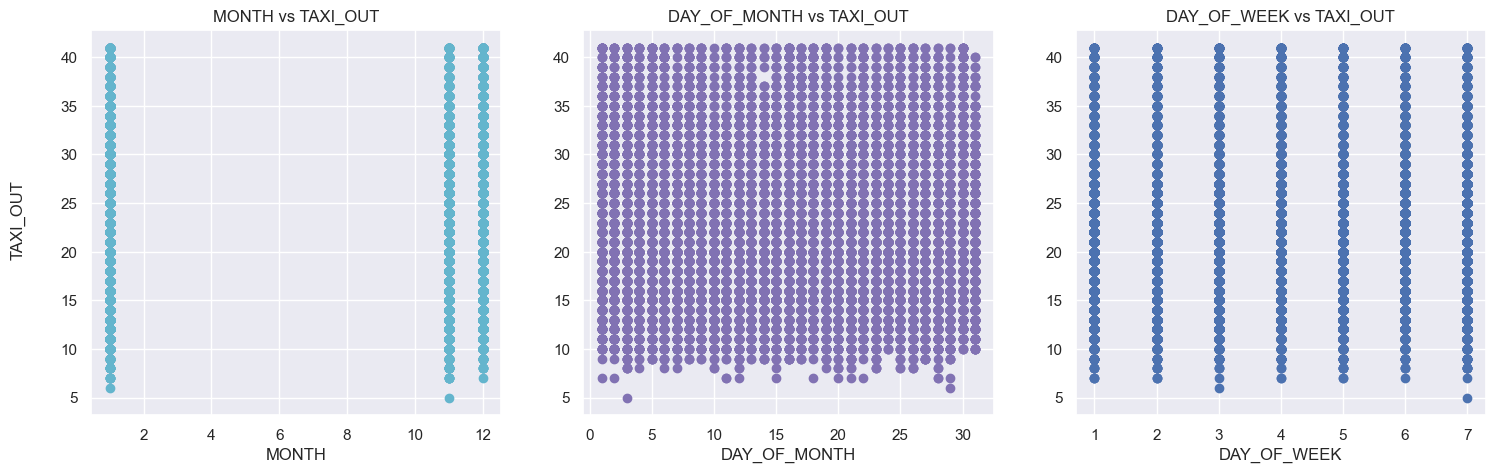

In [103]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))
a[0].scatter(df['MONTH'], df['TAXI_OUT'], color = 'c')
a[0].set_title('MONTH vs TAXI_OUT')
a[0].set_xlabel('MONTH')

a[1].scatter(df['DAY_OF_MONTH'], df['TAXI_OUT'], color = 'm')
a[1].set_title('DAY_OF_MONTH vs TAXI_OUT')
a[1].set_xlabel('DAY_OF_MONTH')

a[2].scatter(df['DAY_OF_WEEK'], df['TAXI_OUT'], color = 'b')
a[2].set_title('DAY_OF_WEEK vs TAXI_OUT')
a[2].set_xlabel('DAY_OF_WEEK')

fig.text(0.08, 0.5, 'TAXI_OUT', va='center', rotation='vertical')

plt.show()

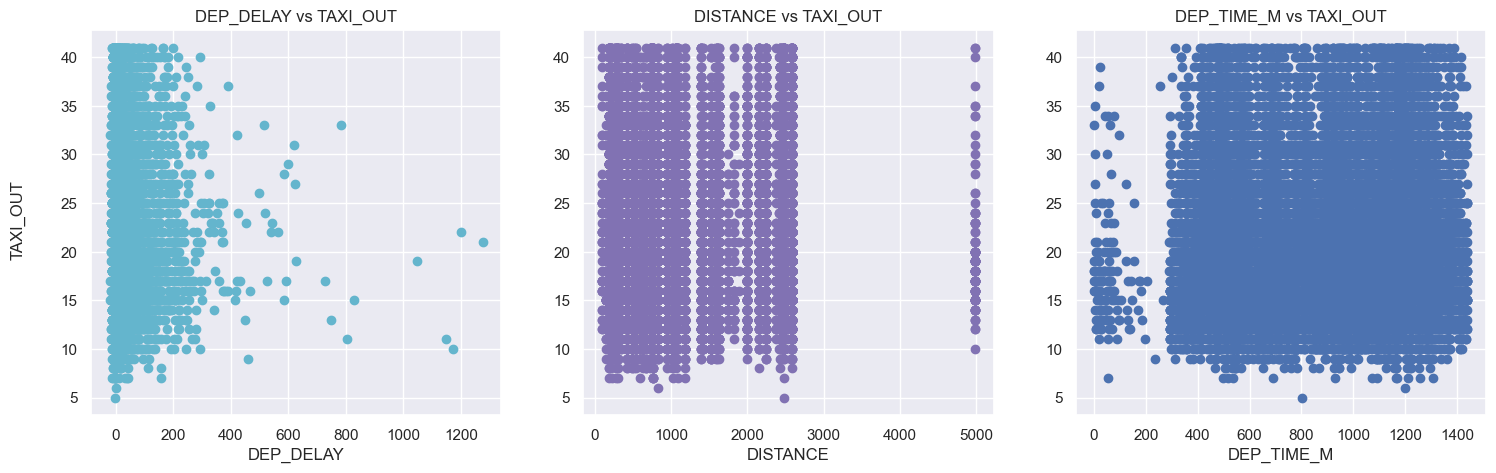

In [104]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))
a[0].scatter(df['DEP_DELAY'], df['TAXI_OUT'], color = 'c')
a[0].set_title('DEP_DELAY vs TAXI_OUT')
a[0].set_xlabel('DEP_DELAY')

a[1].scatter(df['DISTANCE'], df['TAXI_OUT'], color = 'm')
a[1].set_title('DISTANCE vs TAXI_OUT')
a[1].set_xlabel('DISTANCE')

a[2].scatter(df['DEP_TIME_M'], df['TAXI_OUT'], color = 'b')
a[2].set_title('DEP_TIME_M vs TAXI_OUT')
a[2].set_xlabel('DEP_TIME_M')

fig.text(0.08, 0.5, 'TAXI_OUT', va='center', rotation='vertical')

plt.show()

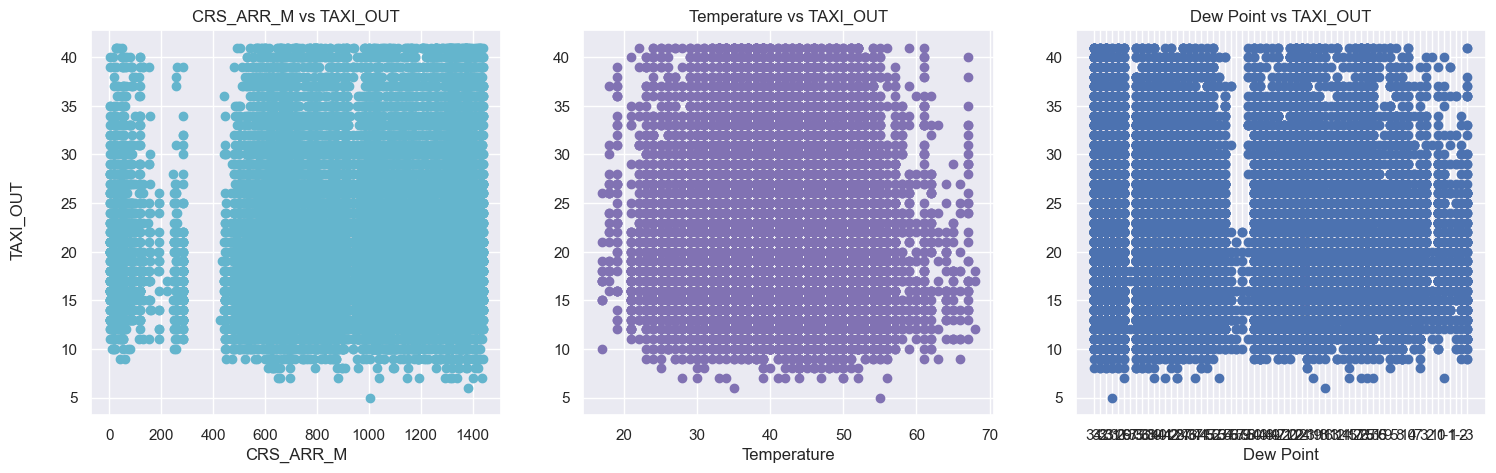

In [105]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))
a[0].scatter(df['CRS_ARR_M'], df['TAXI_OUT'], color = 'c')
a[0].set_title('CRS_ARR_M vs TAXI_OUT')
a[0].set_xlabel('CRS_ARR_M')

a[1].scatter(df['Temperature'], df['TAXI_OUT'], color = 'm')
a[1].set_title('Temperature vs TAXI_OUT')
a[1].set_xlabel('Temperature')

a[2].scatter(df['Dew Point'], df['TAXI_OUT'], color = 'b')
a[2].set_title('Dew Point vs TAXI_OUT')
a[2].set_xlabel('Dew Point')

fig.text(0.08, 0.5, 'TAXI_OUT', va='center', rotation='vertical')

plt.show()

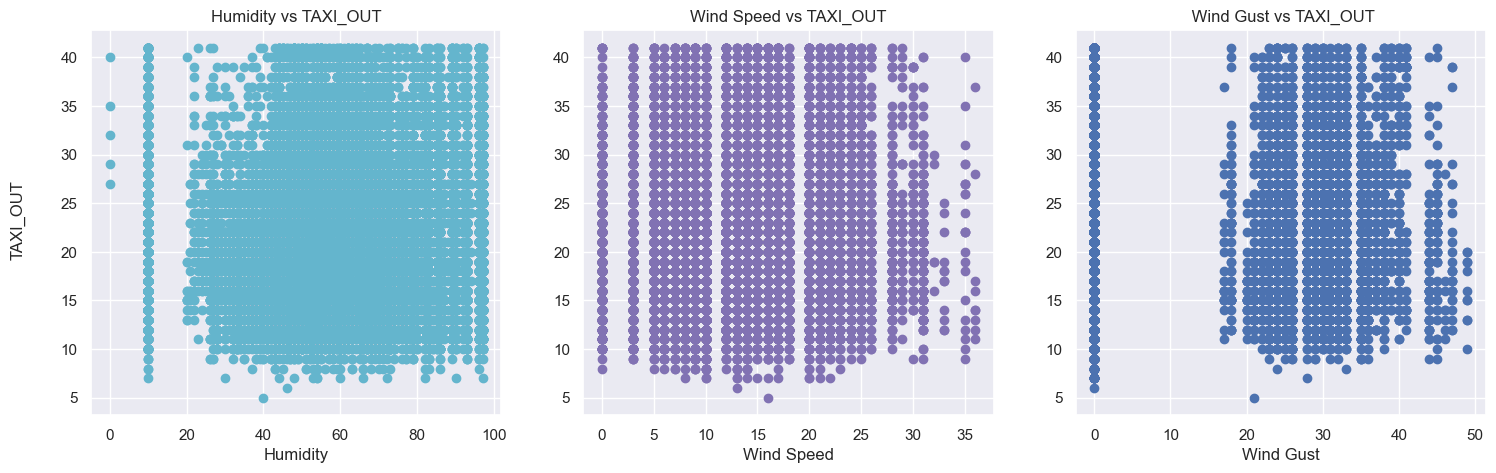

In [106]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))
a[0].scatter(df['Humidity'], df['TAXI_OUT'], color = 'c')
a[0].set_title('Humidity vs TAXI_OUT')
a[0].set_xlabel('Humidity')

a[1].scatter(df['Wind Speed'], df['TAXI_OUT'], color = 'm')
a[1].set_title('Wind Speed vs TAXI_OUT')
a[1].set_xlabel('Wind Speed')

a[2].scatter(df['Wind Gust'], df['TAXI_OUT'], color = 'b')
a[2].set_title(' Wind Gust vs TAXI_OUT')
a[2].set_xlabel('Wind Gust')

fig.text(0.08, 0.5, 'TAXI_OUT', va='center', rotation='vertical')

plt.show()

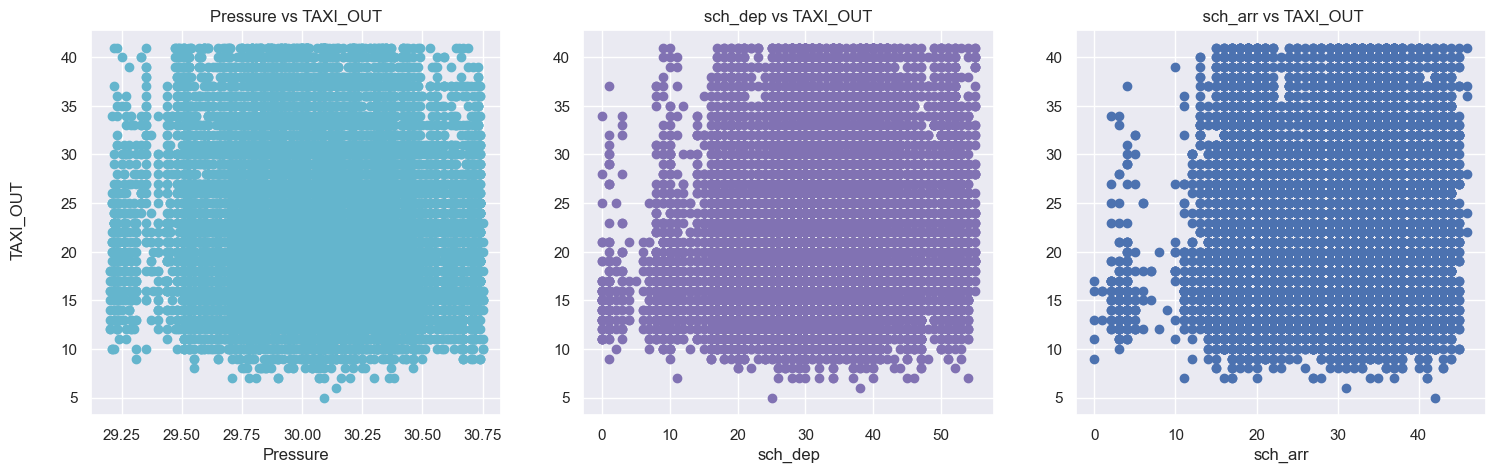

In [107]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))
a[0].scatter(df['Pressure'], df['TAXI_OUT'], color = 'c')
a[0].set_title('Pressure vs TAXI_OUT')
a[0].set_xlabel('Pressure')

a[1].scatter(df['sch_dep'], df['TAXI_OUT'], color = 'm')
a[1].set_title('sch_dep vs TAXI_OUT')
a[1].set_xlabel('sch_dep')

a[2].scatter(df['sch_arr'], df['TAXI_OUT'], color = 'b')
a[2].set_title(' sch_arr vs TAXI_OUT')
a[2].set_xlabel('sch_arr')

fig.text(0.08, 0.5, 'TAXI_OUT', va='center', rotation='vertical')

plt.show()